# Probability. Models for dice and elections
---
This is about the probability of an event like throwing a coin resulting in Head or a dice in a "6". But also about an election model for the 2016, 2020 and 2024 US presidential elections. Let's start with the dice to get familiar with probability from a model.<br><br>
What is the change of getting a 1, 2, 3, 4, 5 or 6 when throwing **one** dice? In general, according to Laplace, the probability of an event (e.g. throwing a coin resulting in Head) is the number of positive outcomes divided by the number of outcomes in the sample space: 
$$probability = \frac{N positive}{N}.$$ For a coin the probability is 1/2, for a dice number 1/6.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product 
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# Random number generator np.random with function choice() selects an item from the list with equal probability
def toss_Dice(n):
    return np.random.choice([1, 2, 3, 4, 5, 6], size = n)

In [3]:
# 5 times tossing a dice
n = 5
dice_number = toss_Dice(n)
print('Tossing ', n ,' times:', dice_number)
print('Probability of resulting in a 6: ', np.sum(dice_number == 6)/n)

Tossing  5  times: [3 1 2 5 3]
Probability of resulting in a 6:  0.0


The more trials are done, the closer the ratio seems to reach the probability 1 out of 6. This is known as the ***law of large numbers*** and is simulated below:

Text(0, 0.5, 'probability of a "6" (simulation)')

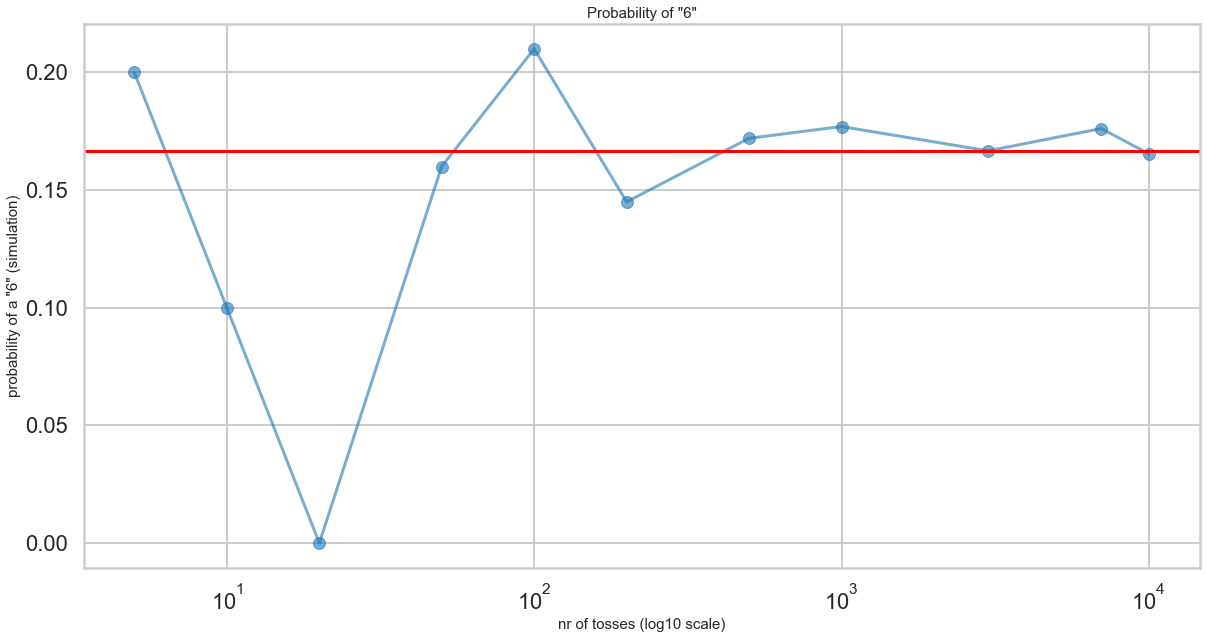

In [4]:
# tossing a dice often
nr_of_times = [5, 10, 20, 50, 100, 200, 500, 1000, 3000, 7000, 10000]
plt.figure(figsize=(20,10))
plt.xscale('log')
plt.plot(nr_of_times, [np.sum(toss_Dice(i)==6)/i for i in nr_of_times], 'o-', alpha=0.6)
plt.axhline(0.16667, 0, 1, color='r')
plt.title('Probability of "6"', fontsize=15)
plt.xlabel('nr of tosses (log10 scale)', fontsize=15)
plt.ylabel('probability of a "6" (simulation)', fontsize=15)

### Two dices: tossing same number
---
Having two identical dices the sample space is now 36. The probability that throwing two dices both result in the same number is
$$P(same\,number\,on\,2\,dices) = \frac{N positive}{N^2}$$ which is 1/36

In [5]:
# sample space for 2 dices
d = 2
res = list(product(range(1, 7), repeat = d)) 
res

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

Text(0, 0.5, 'probability 2 dices with "6" (simulation)')

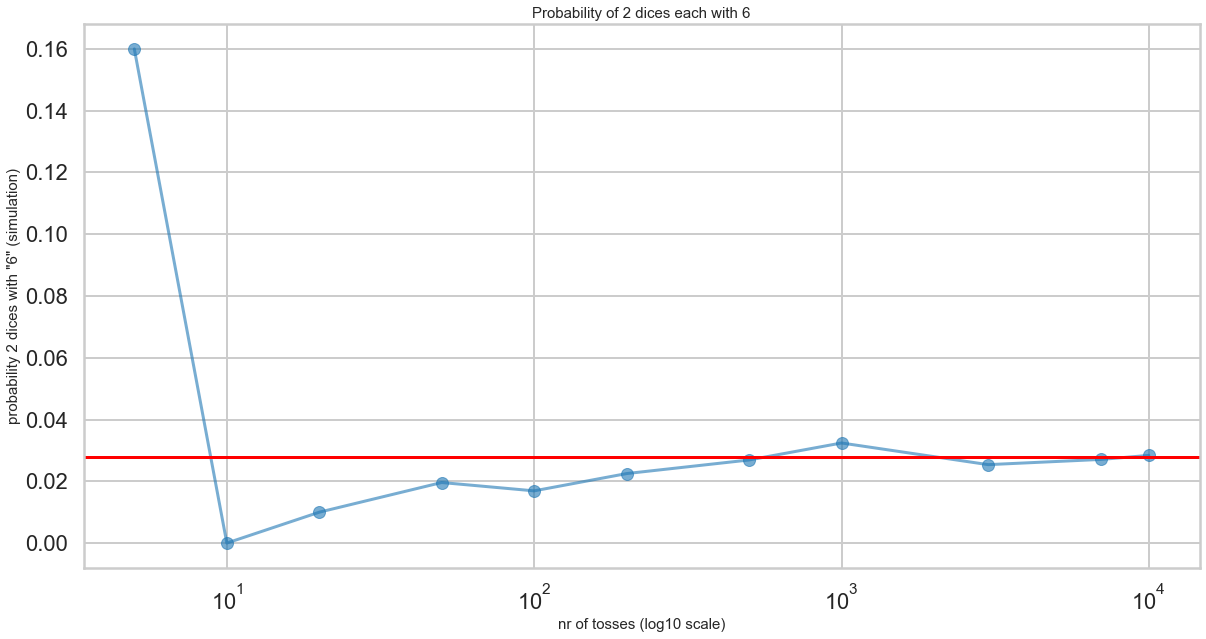

In [6]:
# calculate probability for large numbers
nr_of_times = [5, 10, 20, 50, 100, 200, 500, 1000, 3000, 7000, 10000]
plt.figure(figsize=(20,10))
plt.xscale('log')
plt.plot(nr_of_times, [(np.sum(toss_Dice(i)==6)/i)**2 for i in nr_of_times], 'o-', alpha=0.6)
plt.axhline(0.02777, 0, 1, color='r')
plt.title('Probability of 2 dices each with 6', fontsize=15)
plt.xlabel('nr of tosses (log10 scale)' , fontsize=15)
plt.ylabel('probability 2 dices with "6" (simulation)', fontsize=15)

### Two dices: adding up to 4 or 7
---
Throwing two dices which sum of numbers is 4 or 7. Looking at the sample space:<br>
* 3 add up to 4 => (1,3), (2,2), (3,1)
* 6 add up to 7 => (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)

The probability that throwing two dices result in the sum 4 or sum 7 is:
$$P(sum\,4\,or\,sum\,7\,on\,2\,dices) = \frac{N positive}{N^2}$$ which is 9/36 or 0,25

In [7]:
# 5 times rolling two dices
# 
n = 5
dice_number1 = toss_Dice(n)
dice_number2 = toss_Dice(n)
print('Tossing ', n ,' times:', dice_number1)
print('Tossing ', n ,' times:', dice_number2)
p = np.sum((dice_number1 + dice_number2 == 4) | (dice_number1 + dice_number2 == 7))/n
print('Probability of resulting in sum 4 or 7: ', p)

Tossing  5  times: [5 1 2 6 5]
Tossing  5  times: [2 1 4 6 1]
Probability of resulting in sum 4 or 7:  0.2


Text(0, 0.5, 'probability sum 4 or 7 (simulation)')

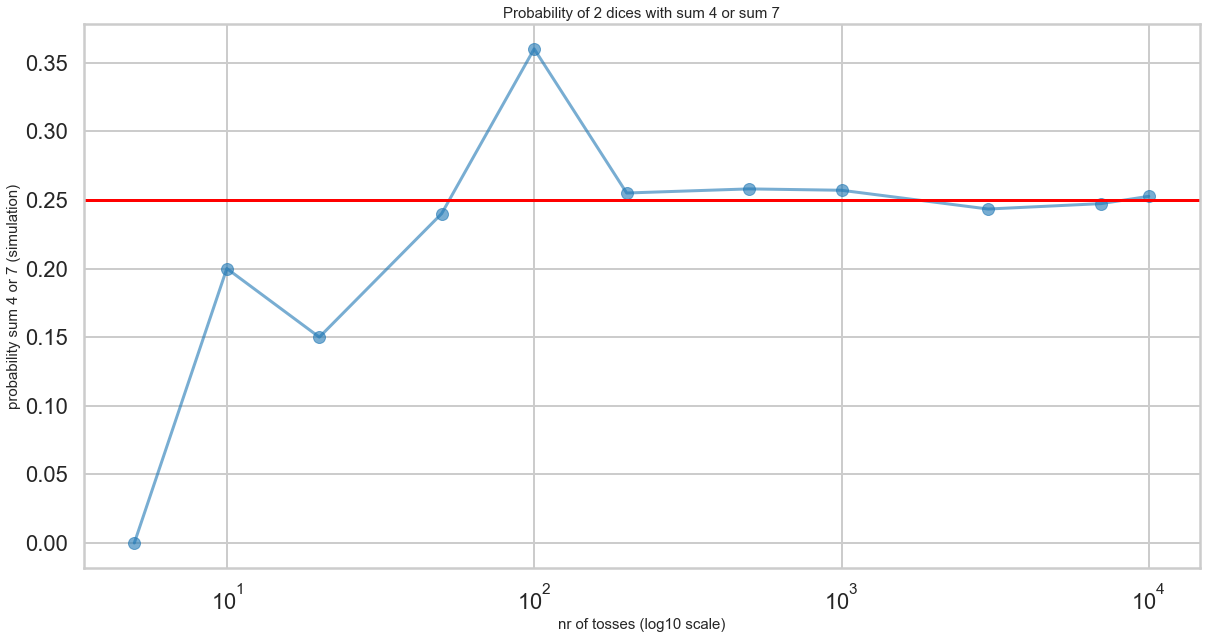

In [8]:
# calculate probability for large numbers
nr_of_times = [5, 10, 20, 50, 100, 200, 500, 1000, 3000, 7000, 10000]
plt.figure(figsize=(20,10))
plt.xscale('log')
# Iterating over the trial list, the toss_Dice result is used for possible sums of 4 or 7 and so must be saved. Because
# assignments can't be done in list comprehensions, a probability list is created for all trials.
pList=[]
for n in nr_of_times:
    dice_number1 = toss_Dice(n)
    dice_number2 = toss_Dice(n)
    pList.append(np.sum((dice_number1 + dice_number2 == 4) | (dice_number1 + dice_number2 == 7))/n)
plt.plot(nr_of_times, [pList[i] for i in range(0, len(nr_of_times))], 'o-', alpha=0.6)
plt.axhline(0.25, 0, 1, color='r')
plt.title('Probability of 2 dices with sum 4 or sum 7', fontsize=15)
plt.xlabel('nr of tosses (log10 scale)', fontsize=15)
plt.ylabel('probability sum 4 or 7 (simulation)', fontsize=15)


### Two dices: sum from 2 to 12
---
Throwing two dices, calculate the probability of sums from 2 to 12. From the two dices sample space, the probability for rolling a certain number is:
* 2 => 1/36
* 3 => 2/36
* 4 => 3/36
* 5 => 4/36
* 6 => 5/36
* 7 => 6/36
* 8 => 5/36
* 9 => 4/36
* 10 => 3/36
* 11 => 2/36
* 12 => 1/36

Text(0.5, 1.0, 'Probability of 2 dices sum 2 to 12')

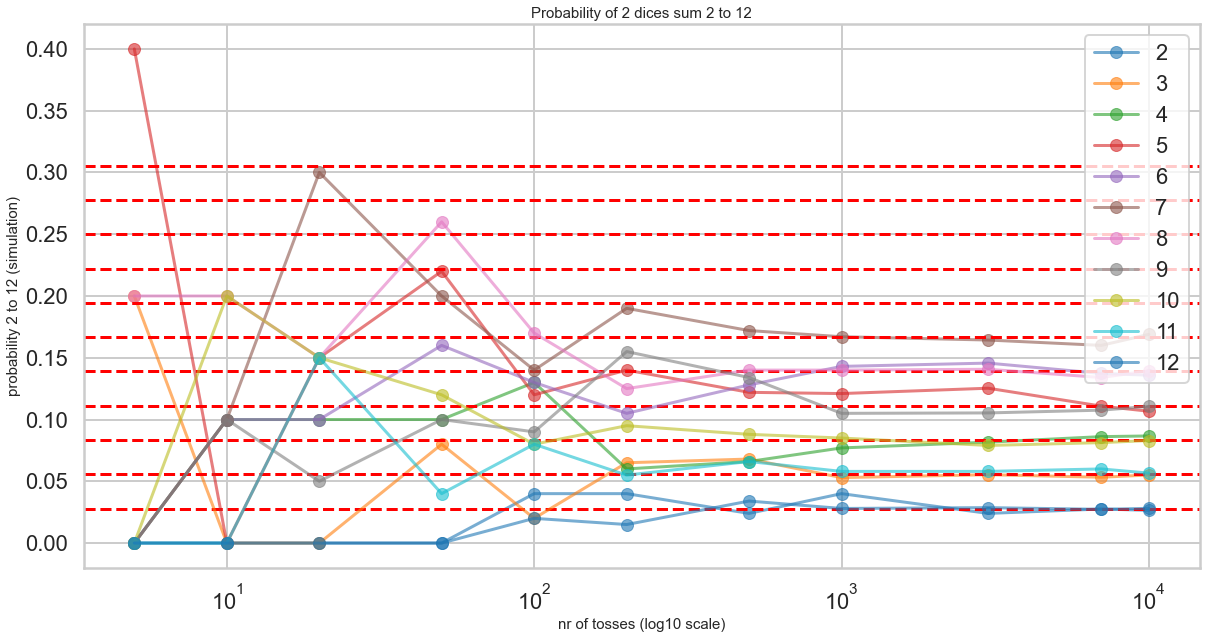

In [9]:
# 11 possible sums
nr_of_times = [5, 10, 20, 50, 100, 200, 500, 1000, 3000, 7000, 10000]
plt.figure(figsize=(20,10))
plt.xscale('log')
for sum in range(2,13):
    plt.plot(nr_of_times, [(np.sum(toss_Dice(i) + toss_Dice(i) == sum)/i) for i in nr_of_times], 'o-', alpha=0.6, label=sum)
    plt.axhline((sum-1)/36, 0, 1, color='r', linestyle= '--')
    plt.legend(loc="upper right")
plt.xlabel('nr of tosses (log10 scale)', fontsize=15)
plt.ylabel('probability 2 to 12 (simulation)', fontsize=15)
plt.title('Probability of 2 dices sum 2 to 12', fontsize=15)

# Simplified election model
---
Note: this is more or less an enhanced copy of the election model for the 2012 US presidential elections from [CS109 - 2015 Lab3](https://github.com/cs109/2015lab3/blob/master/Lab3-probability.ipynb). This is where you can find a description of the model.
<br><br>

Here we want to simulate the outcome of the 2016 US presidential elections based on predictions for each state that Clinton or Trump would win. The model is a table of probabilities derived from the election forecast of [FiveThirtyEight](https://projects.fivethirtyeight.com/2016-election-forecast/?ex_cid=2016-forecast) on November 8, 2016; the day of the elections. As the polls were wrong in their predictions, this makes it an interesting case. Some constants:
* 51 states (including DC)
* 538 voters of the electoral college
* 270 votes needed for win
* actual outcome: Trump winning 304 votes

Estimated probabilities by FiveThirtyEight:


In [6]:
def read_model(model_data):
    return pd.read_csv(model_data).set_index('States')

In [12]:
fte = read_model('data/FiveThirtyEight-08nov2016-PollsOnly.csv')
fte.head()

,Clinton,Trump,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.235,0.764,3
Arizona,0.334,0.666,11
Arkansas,0.004,0.996,6
California,1.000,0.000,55


In [ ]:
# INTERMEZZO on np uniform() function. By default low = 0, high = 1 and returns a 2-dimensional array of 11 rows and 
# max 5 columns
[ print ( np.random.uniform(size=(11, n_sim))) for n_sim in range(1,6)]

In [ ]:
# INTERMEZZO on np sum() axis=0  
my_list = np.arange(18).reshape(3, 6) 
print(my_list)
my_list.sum(axis=0) # columnwise sum
# my_list.sum(axis=1) # rowwise sum

**Explanation** on the `simulate_election()` function below. 
```python
simulations = np.random.uniform(size=(51, n_sim))
```
Simulation as 2-dimensional array of uniformly distributed random numbers. As no low and high parameters are supplied in uniform(), random numbers are generated between 0 and 1. The size parameter regards the output shape (51 rows and n_sim columns); independent of the model.<br><br>
```python
trump_votes = (simulations < model.Trump.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
```
Each of the random `n_sim` simulations is compared with the candidate's prediction per state. The candidate wins this simulation(True = 1) if the random simulation value is less than probability (prediction) and gets the electoral votes. Else (False = 0) the candidate has no votes for that state.<br>
The `reshape(-1, 1)` is needed to get the candidate's prediction and electoral votes in 1 column with 51 rows, just like `simulation` has 51 rows. So `trump_votes` has 10000 electoral vote values for each state. Using `sum(axis=0)` the  electoral votes are added up for each simulation.

In [3]:
def simulate_election(model, candidate, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    candidate_votes = (simulations < getattr(model,candidate).values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    return candidate_votes.sum(axis=0)

For each of the 10000 simulations the candidate's total number of electoral votes is returned. The probability that the candidate wins, is the number of simulations equal or above the victory threshold (270 votes). <br> Obviously Trump is not going to win.

In [14]:
candidate = 'Trump'
result = simulate_election(fte, candidate, 10000)
print ((result >= 270).sum())

990


In [15]:
np.sort(result)

array([137, 137, 141, ..., 328, 330, 348], dtype=int64)

In [ ]:
# INTERMEZZO on quantiles.
# An estimate of the uncertainty is the difference in number of votes at the 5th and 95th quantile.
# Function percentile() sorts and returns the value at 5 and 95.
iq = int(np.percentile(result, 95) - np.percentile(result, 5))
print (round(pwin,2), iq)

In [4]:
def plot_simulation(simulation, candidate, actual_outcome=0): 
    plt.figure(figsize=(20,10))
    plt.hist(simulation, bins=np.arange(100, 538, 1), 
             label='Simulations', align='left', density=True)
    pvotes = int(simulation.mean())
    plt.axvline(actual_outcome, 0, .5, color='r', label='Actual Outcome') if actual_outcome > 0 else plt.axvline(pvotes, 0, .5, color='r', label='Predicted votes')
    plt.axvline(270, 0, .5, color='k', label='Victory Threshold')
    iq = int(np.percentile(simulation, 95) - np.percentile(simulation, 5))
    pwin = (simulation >= 270).mean() * 100
    plt.title('Chance of %s Victory: %0.2f%%, Spread: %d votes, Predicted votes: %0.1f' % (candidate, pwin, iq, pvotes))
    plt.legend(frameon=False, loc='upper right')
    plt.xlabel("%s Electoral College Votes" % (candidate))
    plt.ylabel("Probability")
    sns.despine()

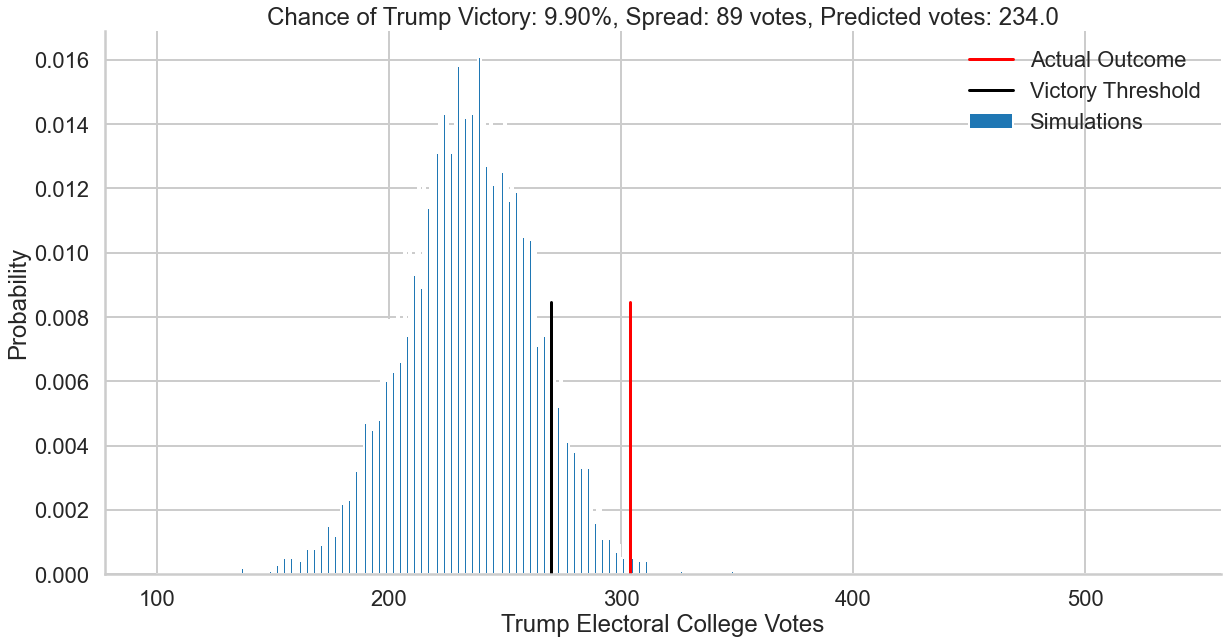

In [17]:
plot_simulation(result, candidate, 304)

Trump won, so it looks like the predictions were right off the beam. The reasons why were widely discussed. Clinton got almost 3 million more popular votes than Trump, but it's the electoral college votes that count.<br><br>The plotted Trump results of this simple model seem pretty similar to the predicted chances by [FiveThirtyEight](https://projects.fivethirtyeight.com/2016-election-forecast/?ex_cid=2016-forecast).
![](data/fivethirtyeightChancesTrump2016.JPG)

### Prediction 2020 US presidential elections
01-10-2020. Now let's try out this approach for the 2020 US presidential elections. Again the model data is taken from [FiveThirtyEight](https://projects.fivethirtyeight.com/2020-election-forecast/). The forecast dates from 30-09-2020. So the data is collected after the first presidential debate of 29-09-2020 (and after the news of president Trump's federal income tax). Some constants:
* 51 states (including DC)
* 538 voters of the electoral college
* 270 votes needed for win
* actual outcome: ? (known on Election day 03-11-2020)



In [16]:
fte = read_model('data/FiveThirtyEight-30sep2020.csv')
fte.head()

,Trump,Biden,Votes
States,,,
Alabama,0.586,0.406,9
Alaska,0.527,0.450,3
Arizona,0.482,0.504,11
Arkansas,0.565,0.419,6
California,0.342,0.639,55


In [17]:
# name candidate from datframe
candidate = 'Trump'
result = simulate_election(fte, candidate, 10000)
print ((result >= 270).sum())

3281


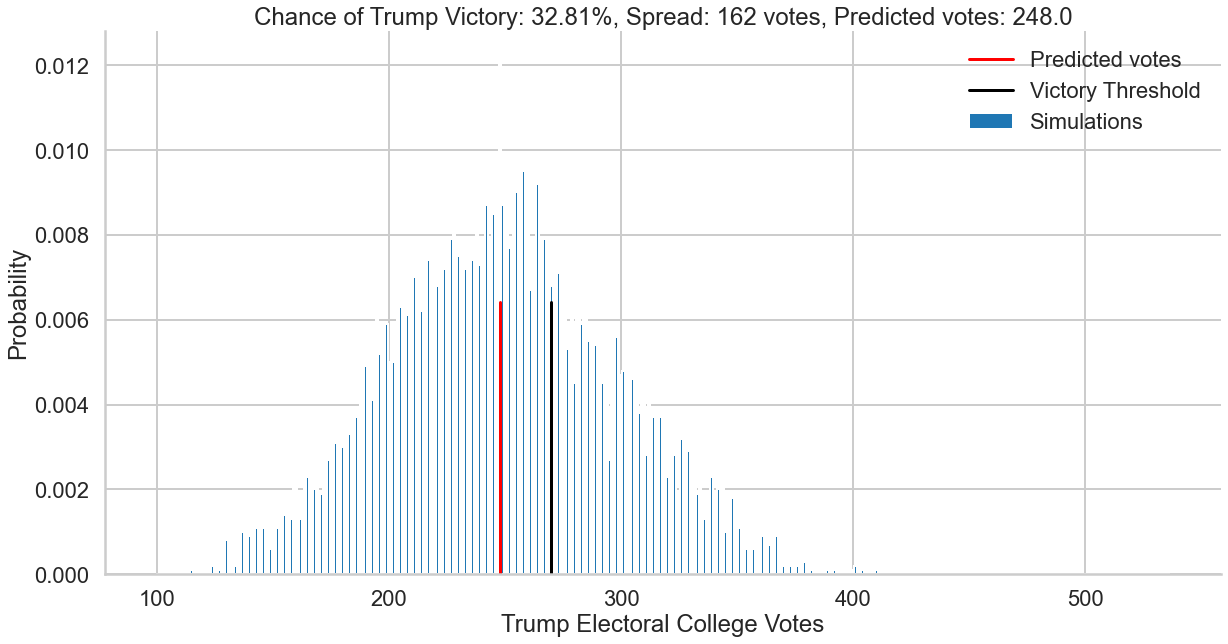

In [18]:
# outcome not known
plot_simulation(result, candidate)

### Prediction 2024 US presidential elections
21-09-2024. Four years later trying this approach again for the 2024 US presidential elections. The model data is taken from [FiveThirtyEight](https://projects.fivethirtyeight.com/polls/president-general/2024/national/) and [270toWin](https://www.270towin.com/2024-presidential-election-polls/). The forecast dates are collected 21-09-2024 and range from 30-07-2024 to 19-09-2024. Most of the data is from after the presidential debate of 10-09-2024 between Trump and Harris. Polls from 7 states date from before the debate on 10-09-2024. 17 states are without poll data; in this case the FiveThirtyEight forecast of 13-09-2024 is taken. Some constants:
* 51 states (including DC)
* 538 voters of the electoral college
* 270 votes needed for win
* actual outcome: ? (known on Election day 05-11-2024)



In [18]:
fte = read_model('data/FiveThirtyEight-21sep2024.csv')
fte.head()

,Trump,Harris,Votes,Source,Date__latest_poll
States,,,,,
Alabama,0.630,0.370,9,FiveThirtyEight,forecast_2024-09-13_noPollYet
Alaska,0.470,0.420,3,270towin,2024-09-13
Arizona,0.472,0.468,11,270towin,2024-09-19
Arkansas,0.550,0.400,6,270towin,2024-09-13
California,0.325,0.600,54,270towin,2024-09-19


In [27]:
# name candidate from datframe
candidate = 'Trump'
result = simulate_election(fte, candidate, 10000)
print ((result >= 270).sum())

3487


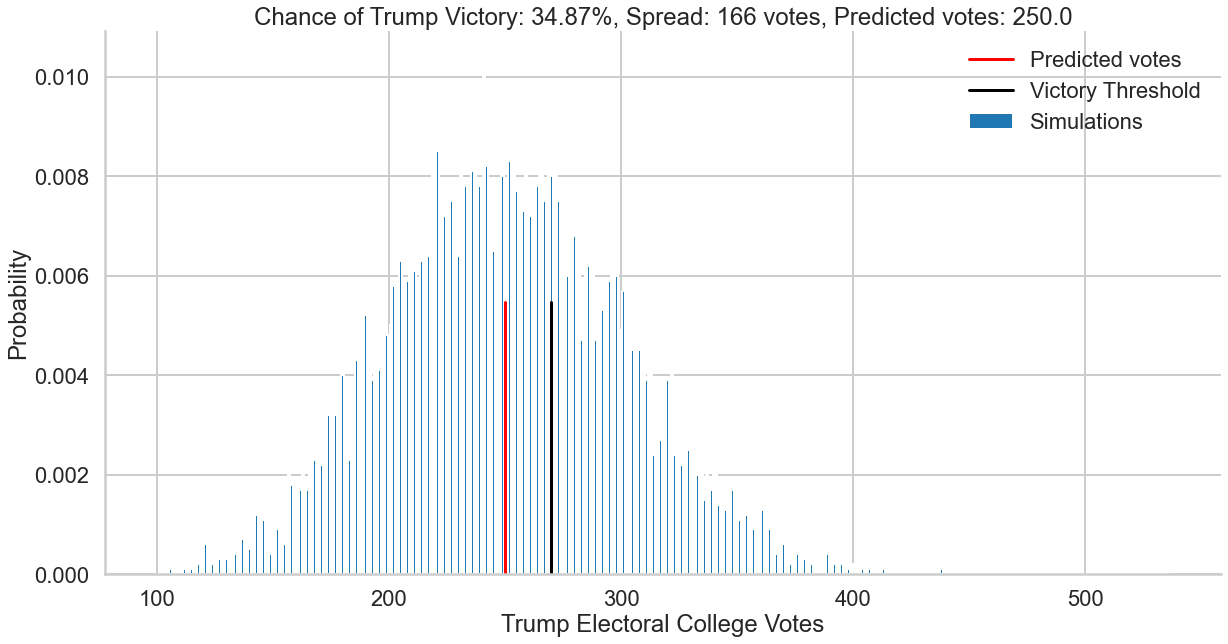

In [28]:
# outcome not known
plot_simulation(result, candidate)

In [10]:
# name candidate from datframe
candidate = 'Harris'
result = simulate_election(fte, candidate, 10000)
print ((result >= 270).sum())

4681


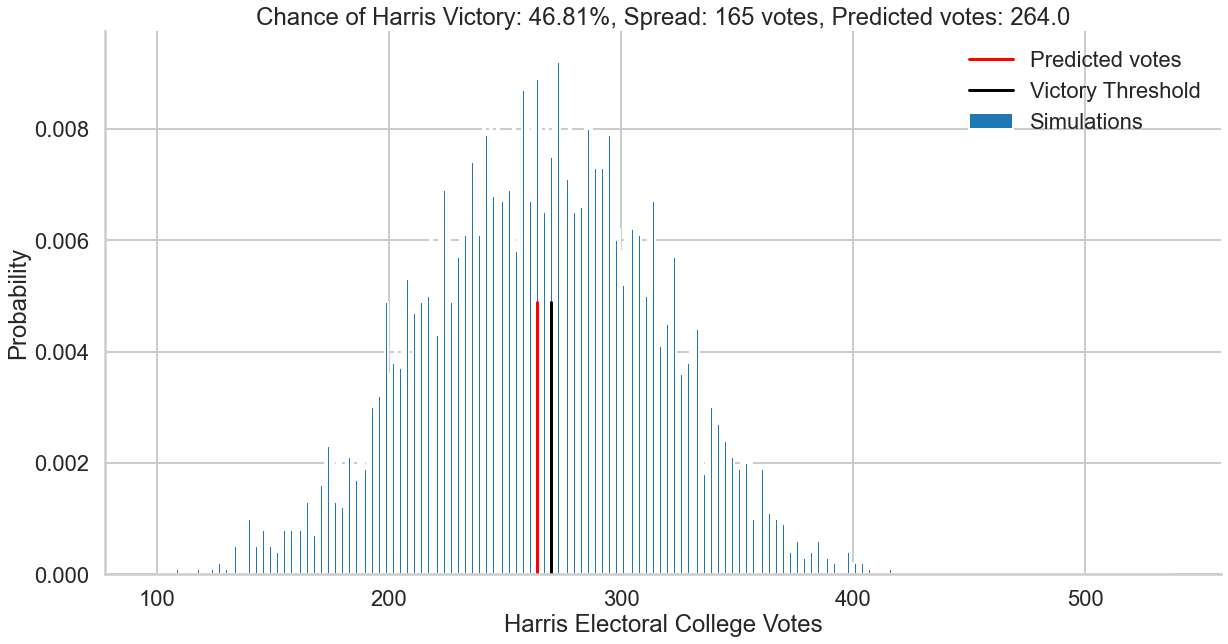

In [11]:
# outcome not known
plot_simulation(result, candidate)

07-11-2024. Almost two months after the Trump-Harris debate (10-09-2024) on which I based the simulations for the predicted votes, the results of Election Day 05-11-2024 are known. Candidate Trump gained <b>295</b> electoral votes against 226 for Harris.

Some remarks:
* Eight years ago, in 2016, Trump won (from Clinton) with <b>304</b> electoral votes. 
* In 2016 Clinton got more popular votes than Trump. Despite having less electoral votes in 2024 (295) Trump also won more popular votes.
* the plot below shows a simulation of Trump's predicted votes (250) based on 21-09-2024 forecast data. The vertical red bar is the actual outcome (295)



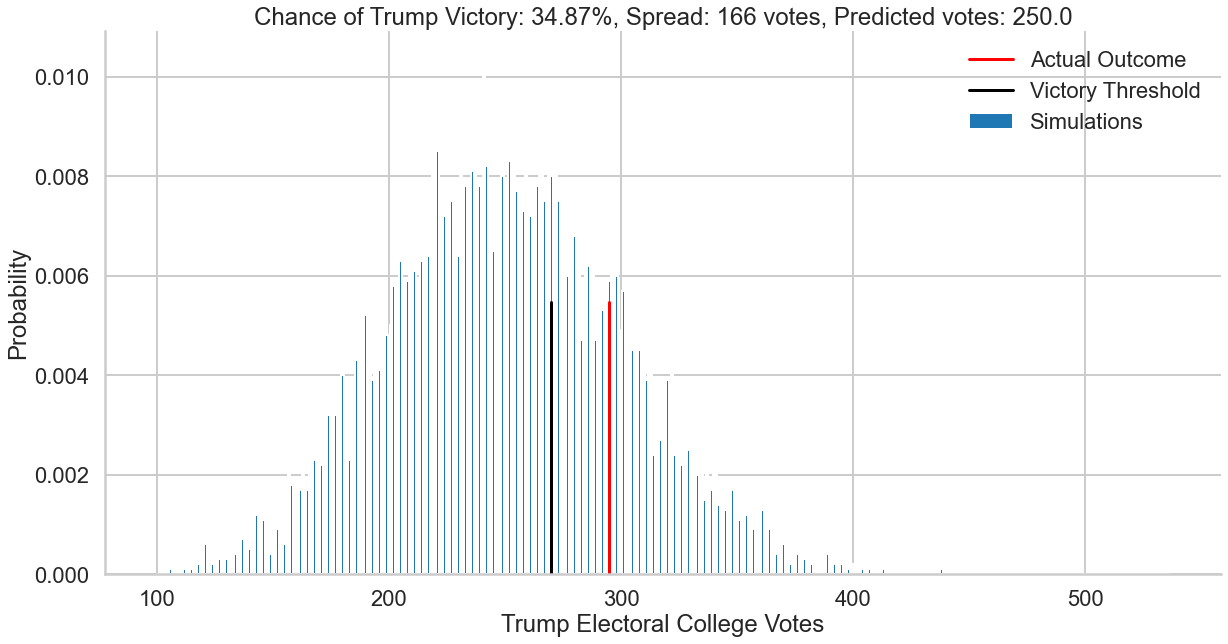

In [29]:
# 5 november 2024
plot_simulation(result, candidate, 295)